Q1

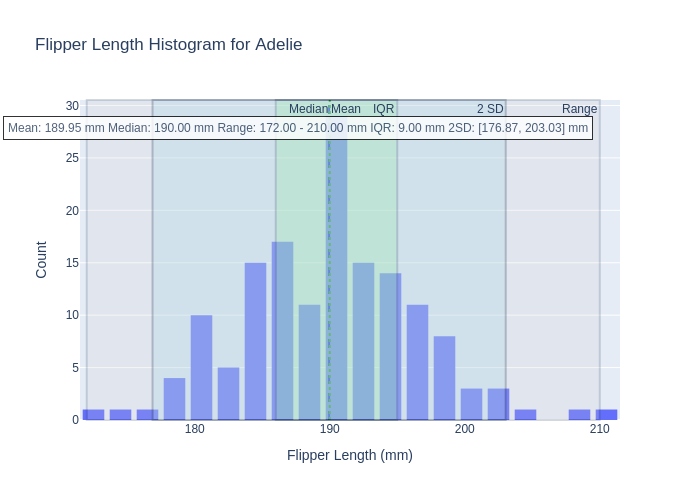

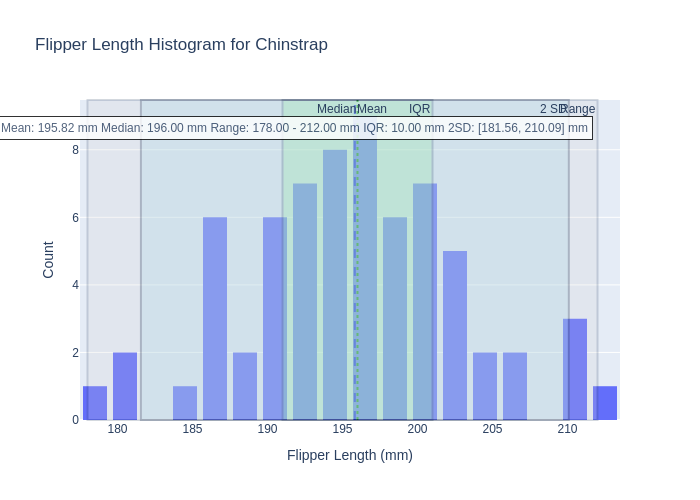

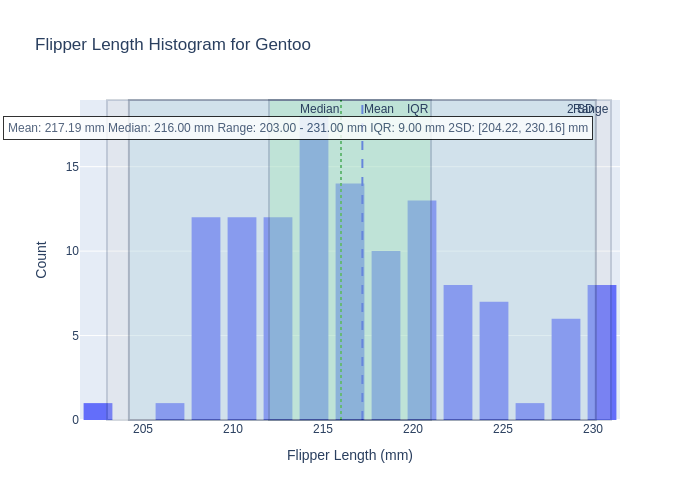

In [3]:
import plotly.graph_objects as go
import pandas as pd

# Load the penguins dataset from the Seaborn repository
penguins = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

# Remove rows with missing values in flipper_length_mm
penguins = penguins.dropna(subset=['flipper_length_mm'])

# Function to create histogram and mark statistics with annotations
def create_histogram_with_stats_annotated(species_data, species_name):
    # Get statistics for flipper_length_mm
    flipper_lengths = species_data['flipper_length_mm']
    mean_fl = flipper_lengths.mean()
    median_fl = flipper_lengths.median()
    min_fl = flipper_lengths.min()
    max_fl = flipper_lengths.max()
    std_fl = flipper_lengths.std()
    q1_fl = flipper_lengths.quantile(0.25)
    q3_fl = flipper_lengths.quantile(0.75)
    iqr = q3_fl - q1_fl
    
    # Create the figure
    fig = go.Figure()

    # Add histogram for flipper_length_mm
    fig.add_trace(go.Histogram(x=flipper_lengths, nbinsx=20, name=f'{species_name}'))

    # Mark the mean and median using vertical lines
    fig.add_vline(x=mean_fl, line_dash="dash", line_color="blue", annotation_text="Mean", annotation_position="top right")
    fig.add_vline(x=median_fl, line_dash="dot", line_color="green", annotation_text="Median", annotation_position="top left")

    # Mark the range using a vertical rectangle
    fig.add_vrect(x0=min_fl, x1=max_fl, fillcolor="lightgrey", opacity=0.2, annotation_text="Range")

    # Mark the IQR using another vertical rectangle
    fig.add_vrect(x0=q1_fl, x1=q3_fl, fillcolor="lightgreen", opacity=0.3, annotation_text="IQR")

    # Mark 2 standard deviations away from the mean using another vertical rectangle
    fig.add_vrect(x0=mean_fl - 2*std_fl, x1=mean_fl + 2*std_fl, fillcolor="lightblue", opacity=0.3, annotation_text="2 SD")

    # Add text annotations with data characteristics
    text_annotation = f"Mean: {mean_fl:.2f} mm\nMedian: {median_fl:.2f} mm\nRange: {min_fl:.2f} - {max_fl:.2f} mm\nIQR: {iqr:.2f} mm\n2SD: [{mean_fl - 2*std_fl:.2f}, {mean_fl + 2*std_fl:.2f}] mm"
    
    fig.add_annotation(
        xref="paper", yref="paper", x=0.95, y=0.95, showarrow=False,
        text=text_annotation,
        bordercolor="black", borderwidth=1, borderpad=4, bgcolor="white", opacity=0.8
    )

    # Update layout
    fig.update_layout(
        title=f'Flipper Length Histogram for {species_name}',
        xaxis_title='Flipper Length (mm)',
        yaxis_title='Count',
        bargap=0.2
    )

    return fig

# Create a histogram with stats for each species and display the plot
species_data_grouped = penguins.groupby('species')

for species, species_data in species_data_grouped:
    fig = create_histogram_with_stats_annotated(species_data, species)
    fig.show(renderer="png")


Q2

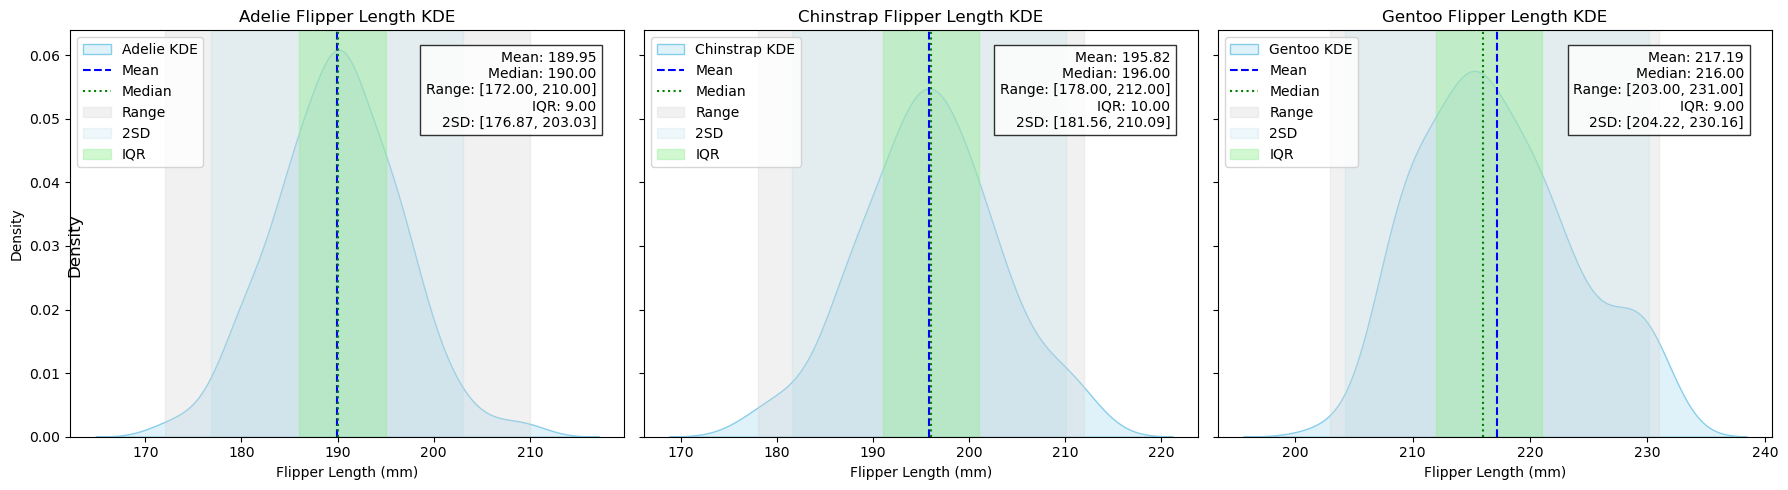

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load the penguins dataset
penguins = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

# Remove rows with missing values in flipper_length_mm
penguins = penguins.dropna(subset=['flipper_length_mm'])

# Get unique species
species_list = penguins['species'].unique()

# Create a row of three KDE plots, one for each species
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

for i, species in enumerate(species_list):
    species_data = penguins[penguins['species'] == species]
    flipper_lengths = species_data['flipper_length_mm']
    
    # Calculate statistics
    mean_fl = flipper_lengths.mean()
    median_fl = flipper_lengths.median()
    min_fl = flipper_lengths.min()
    max_fl = flipper_lengths.max()
    std_fl = flipper_lengths.std()
    q1_fl = flipper_lengths.quantile(0.25)
    q3_fl = flipper_lengths.quantile(0.75)
    iqr = q3_fl - q1_fl
    
    # Plot KDE
    sns.kdeplot(flipper_lengths, ax=axes[i], fill=True, color='skyblue', label=f'{species} KDE')
    
    # Mark mean and median with vertical lines
    axes[i].axvline(mean_fl, color='blue', linestyle='--', label='Mean')
    axes[i].axvline(median_fl, color='green', linestyle=':', label='Median')
    
    # Shade areas for range, IQR, and 2SD
    axes[i].axvspan(min_fl, max_fl, color='lightgrey', alpha=0.3, label='Range')
    axes[i].axvspan(mean_fl - 2*std_fl, mean_fl + 2*std_fl, color='lightblue', alpha=0.2, label='2SD')
    axes[i].axvspan(q1_fl, q3_fl, color='lightgreen', alpha=0.4, label='IQR')
    
    # Add text annotations for statistics
    axes[i].text(0.95, 0.95, f"Mean: {mean_fl:.2f}\nMedian: {median_fl:.2f}\nRange: [{min_fl:.2f}, {max_fl:.2f}]\nIQR: {iqr:.2f}\n2SD: [{mean_fl - 2*std_fl:.2f}, {mean_fl + 2*std_fl:.2f}]",
                 transform=axes[i].transAxes, fontsize=10, verticalalignment='top', horizontalalignment='right',
                 bbox=dict(facecolor='white', alpha=0.8))

    # Set title and labels
    axes[i].set_title(f'{species} Flipper Length KDE')
    axes[i].set_xlabel('Flipper Length (mm)')
    axes[i].legend(loc='upper left')

# Set common y-axis label
fig.text(0.04, 0.5, 'Density', va='center', rotation='vertical', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()


Q3

The box chart can directly see the characteristics of the data, the histogram can see the frequency distribution of the data, but it is generally discontinuous, and the KDE is a smooth curve to help us better understand the data distribution. I personally prefer KDE because it is a continuous curve, which makes it easier for me to read the data, and at the same time, it is convenient for me to study the data from a mathematical point of view

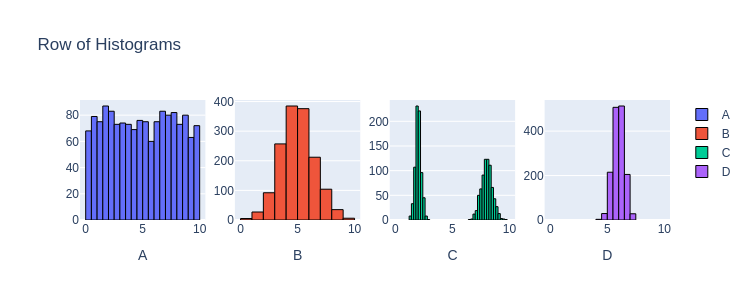

In [4]:
from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

fig = make_subplots(rows=1, cols=4)

fig.add_trace(go.Histogram(x=data1, name='A', nbinsx=30, marker=dict(line=dict(color='black', width=1))), row=1, col=1)
fig.add_trace(go.Histogram(x=data2, name='B', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=2)
fig.add_trace(go.Histogram(x=data3, name='C', nbinsx=45, marker=dict(line=dict(color='black', width=1))), row=1, col=3)
fig.add_trace(go.Histogram(x=data4, name='D', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=4)

fig.update_layout(height=300, width=750, title_text="Row of Histograms")
fig.update_xaxes(title_text="A", row=1, col=1)
fig.update_xaxes(title_text="B", row=1, col=2)
fig.update_xaxes(title_text="C", row=1, col=3)
fig.update_xaxes(title_text="D", row=1, col=4)
fig.update_xaxes(range=[-0.5, 10.5])

for trace in fig.data:
    trace.xbins = dict(start=0, end=10)
    
# This code was produced by just making requests to Microsoft Copilot
# https://github.com/pointOfive/stat130chat130/blob/main/CHATLOG/wk3/COP/SLS/0001_concise_makeAplotV1.md

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

Q4
1. B, D 
2. A, B
3. B, D
4. A, C

Here’s a summary of our conversation:

Plot Comparisons (Box Plot, Histogram, KDE):

We discussed the advantages and drawbacks of using Box Plots, Histograms, and Kernel Density Estimation (KDE) plots.
Box Plot: Great for summary statistics and detecting outliers but doesn’t show distribution shape or frequency.
Histogram: Shows frequency distribution but is sensitive to bin size and can miss smooth trends.
KDE: Provides a smooth, continuous view of the data distribution but can oversmooth or undersmooth depending on the bandwidth.
Plotting KDE for Penguins Dataset:

I provided code using Seaborn’s KDE plots to visualize the flipper length distributions for different penguin species, highlighting key statistics (mean, median, range, IQR, and 2SD).
Dataset Analysis Using Histograms:

We discussed four generated datasets, and I provided answers to specific questions about their means and variances based on histograms:
Similar means and similar variances: Datasets B and D.
Similar means but different variances: Datasets A and B.
Similar variances but different means: Datasets B and D.
Different means and different variances: Datasets A and C.
Each plot and statistical measure provides different insights into data distribution, and we explored the best use cases for each method while analyzing both theoretical and simulated data.

https://chatgpt.com/share/66f4f006-3de8-8000-af79-1a15e1516d40

Q5

The mean and median show different relationships in the skewed distribution. In a right-biased distribution, a larger value in the data pulls the mean higher to the right, making it larger than the median; In a left-skewed distribution, smaller values in the data pull the mean down to the left, making it less than the median. The mean is susceptible to extreme values, while the median is not, so their difference in a skewed distribution reflects how skewed the distribution is. For symmetric distributions, the mean and median are equal.

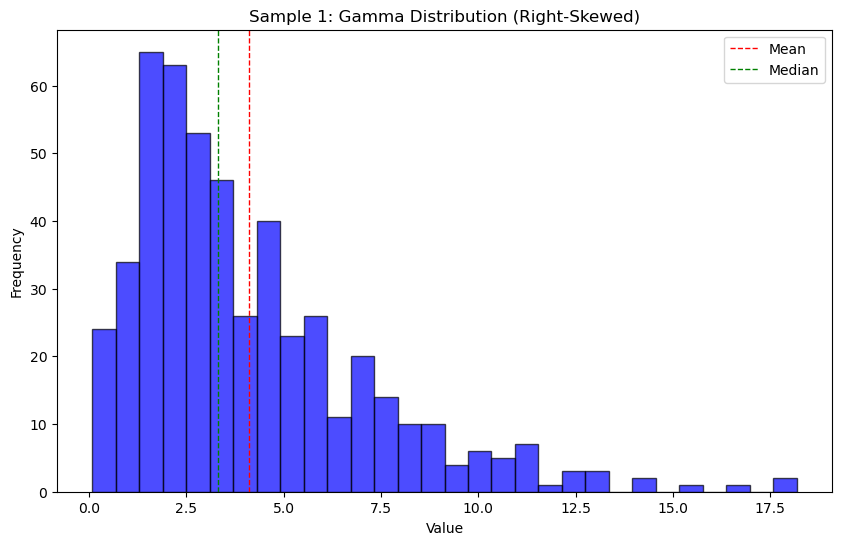

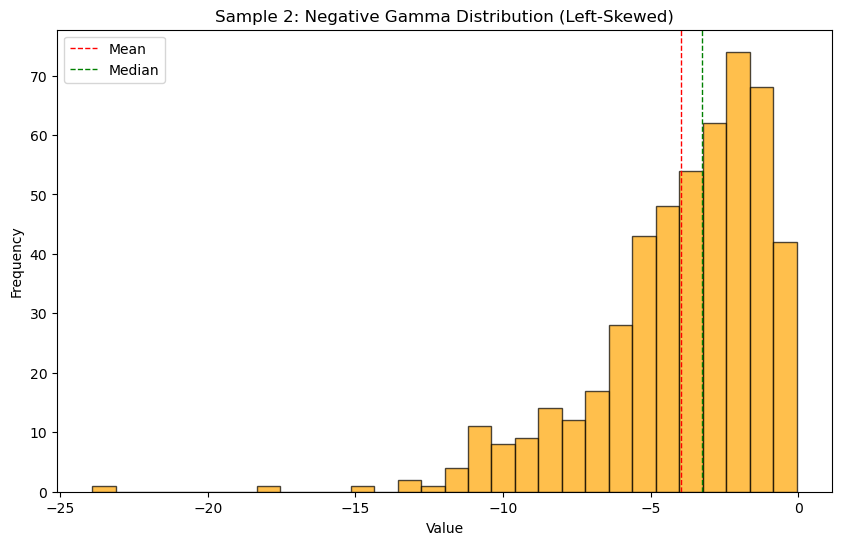

Sample 1 - Mean: 4.110837721204191, Median: [3.32383583]
Sample 2 - Mean: -3.9671699996977017, Median: [-3.28138557]


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Generate Sample 1 (right-skewed) with a smaller sample size
sample1 = stats.gamma(a=2, scale=2).rvs(size=500)  # Reduced size to 500

# Calculate mean and median for Sample 1
mean1 = sample1.mean()
median1 = np.quantile(sample1, [0.5])

# Plot histogram for Sample 1 using Matplotlib
plt.figure(figsize=(10, 6))
plt.hist(sample1, bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.title("Sample 1: Gamma Distribution (Right-Skewed)")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.axvline(mean1, color='red', linestyle='dashed', linewidth=1, label='Mean')
plt.axvline(median1, color='green', linestyle='dashed', linewidth=1, label='Median')
plt.legend()
plt.show()

# Generate Sample 2 (left-skewed) with a smaller sample size
sample2 = -stats.gamma(a=2, scale=2).rvs(size=500)  # Reduced size to 500

# Calculate mean and median for Sample 2
mean2 = sample2.mean()
median2 = np.quantile(sample2, [0.5])

# Plot histogram for Sample 2 using Matplotlib
plt.figure(figsize=(10, 6))
plt.hist(sample2, bins=30, alpha=0.7, color='orange', edgecolor='black')
plt.title("Sample 2: Negative Gamma Distribution (Left-Skewed)")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.axvline(mean2, color='red', linestyle='dashed', linewidth=1, label='Mean')
plt.axvline(median2, color='green', linestyle='dashed', linewidth=1, label='Median')
plt.legend()
plt.show()

# Output the results
print(f"Sample 1 - Mean: {mean1}, Median: {median1}")
print(f"Sample 2 - Mean: {mean2}, Median: {median2}")


Q6

First few rows of the dataset:
    Entity Code  Year  num_objects
0    APSCO  NaN  2023            1
1  Algeria  DZA  2002            1
2  Algeria  DZA  2010            1
3  Algeria  DZA  2016            3
4  Algeria  DZA  2017            1

Column names in the dataset:
Index(['Entity', 'Code', 'Year', 'num_objects'], dtype='object')


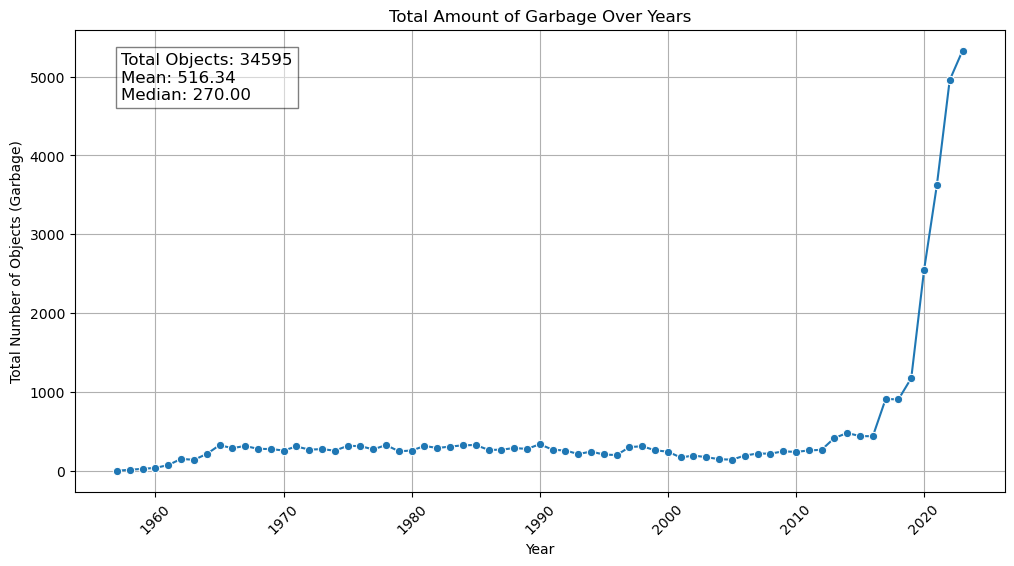

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
url = "https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2024/2024-04-23/outer_space_objects.csv"
df = pd.read_csv(url)

# Display the first few rows and column names of the dataset
print("First few rows of the dataset:")
print(df.head())

print("\nColumn names in the dataset:")
print(df.columns)

# Group by Year and sum the number of objects
garbage_per_year = df.groupby('Year')['num_objects'].sum().reset_index()

# Calculate data characteristics
total_garbage = garbage_per_year['num_objects'].sum()
mean_garbage = garbage_per_year['num_objects'].mean()
median_garbage = garbage_per_year['num_objects'].median()

# Visualization of total number of objects (garbage) over the years
plt.figure(figsize=(12, 6))
sns.lineplot(data=garbage_per_year, x='Year', y='num_objects', marker='o')
plt.title('Total Amount of Garbage Over Years')
plt.xlabel('Year')
plt.ylabel('Total Number of Objects (Garbage)')
plt.xticks(rotation=45)
plt.grid()

# Annotate the graph with data characteristics
textstr = f'Total Objects: {total_garbage}\nMean: {mean_garbage:.2f}\nMedian: {median_garbage:.2f}'
plt.gca().text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=12,
                verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))

plt.show()


Q7

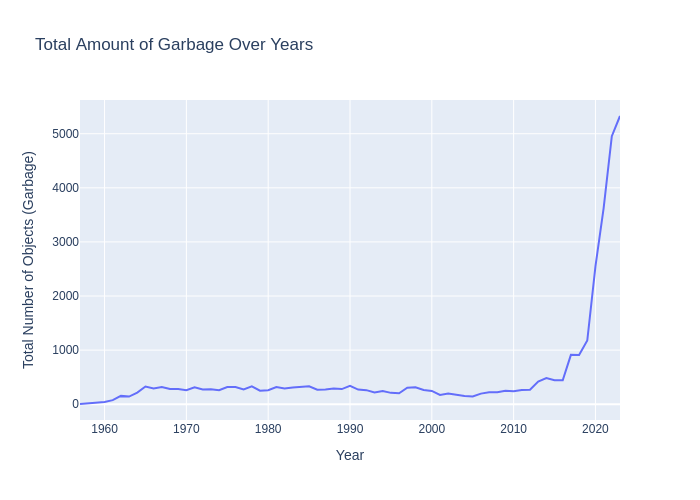

In [1]:
import pandas as pd
import plotly.express as px

# Load the dataset
url = "https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2024/2024-04-23/outer_space_objects.csv"
df = pd.read_csv(url)

# Group by Year and sum the number of objects
garbage_per_year = df.groupby('Year')['num_objects'].sum().reset_index()

# Calculate data characteristics
total_garbage = garbage_per_year['num_objects'].sum()
mean_garbage = garbage_per_year['num_objects'].mean()
median_garbage = garbage_per_year['num_objects'].median()

# Create the Plotly figure with hover data
fig = px.line(
    garbage_per_year,
    x='Year',
    y='num_objects',
    title='Total Amount of Garbage Over Years',
    labels={'num_objects': 'Total Number of Objects (Garbage)', 'Year': 'Year'},
)

# Update the hover data to include total, mean, and median
fig.update_traces(hovertemplate=
    'Year: %{x}<br>' +
    'Total Objects: %{y}<br>' +
    f'Total Objects (Overall): {total_garbage}<br>' +
    f'Mean: {mean_garbage:.2f}<br>' +
    f'Median: {median_garbage:.2f}<br>' +
    '<extra></extra>'
)

# Show the figure
fig.show(renderer="png")



I changed the original image to an animation effect that can follow the mouse to show the data.

Here’s a summary of our discussion:

Data Exploration:

We started by examining a dataset about outer space objects, focusing on the available columns, which included 'Entity', 'Code', 'Year', and 'num_objects'.
We identified 'Year' and 'num_objects' as the relevant columns for visualizing the total amount of garbage over the years.
Initial Visualization:

I provided code to visualize the total number of garbage objects over the years using Matplotlib. We calculated statistics such as total, mean, and median and displayed these in the graph.
Plotly Visualization:

Upon your request to convert the graph to a Plotly version, I provided updated code to create an interactive line plot.
The Plotly graph included dynamic annotations that displayed total, mean, and median values when hovering over the data points.
Dynamic Hover Information:

We further refined the Plotly visualization to ensure that each data point displayed relevant statistics dynamically as the mouse moved over it, making the graph interactive and informative.
Final Output:

The final code created a visually appealing and interactive graph using Plotly, showcasing the total amount of garbage over the years with detailed hover information.
If you need further details on any specific topic or additional assistance, feel free to ask!

https://chatgpt.com/share/66f52357-ebfc-8000-92b8-7564117f4434

Q8

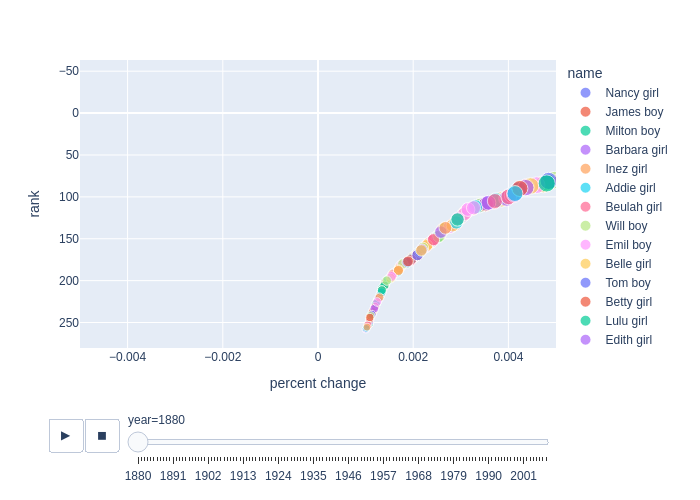

In [5]:
import pandas as pd
import plotly.express as px

# Load the dataset
bn = pd.read_csv('https://raw.githubusercontent.com/hadley/data-baby-names/master/baby-names.csv')

# Make identical boy and girl names distinct
bn['name'] = bn['name'] + " " + bn['sex']

# Calculate the rank of names based on their percentage for each year
bn['rank'] = bn.groupby('year')['percent'].rank(ascending=False)

# Sort by name and year to calculate the percent change
bn = bn.sort_values(['name', 'year'])

# Calculate the increase or decrease in name prevalence from the last year
bn['percent change'] = bn['percent'].diff()

# Identify new names (first occurrence in the dataset) and assign their percent change to themselves
new_name = [True] + list(bn.name[:-1].values != bn.name[1:].values)
bn.loc[new_name, 'percent change'] = bn.loc[new_name, 'percent']

# Sort by year again to prepare for animation
bn = bn.sort_values('year')

# Filter out rare names (names with a percentage below 0.001%)
bn = bn[bn.percent > 0.001]

# Create an animated scatter plot with Plotly Express
fig = px.scatter(
    bn, 
    x='percent change', 
    y='rank', 
    animation_frame='year', 
    animation_group='name', 
    size='percent', 
    color='name', 
    hover_name='name',
    size_max=50, 
    range_x=[-0.005, 0.005]  # You can adjust this range as needed
)

# Invert the y-axis to have rank 1 at the top
fig.update_yaxes(autorange='reversed')

# For GitHub and MarkUs submissions (static PNG)
fig.show(renderer="png")



In this conversation:

Dataset Handling: You provided a snippet of Python code where you loaded a baby names dataset from a CSV file and performed several transformations, including:

Making identical boy and girl names distinct.
Ranking names based on their percentage of occurrences each year.
Calculating the percentage change in name prevalence over time.
Filtering the dataset to include only common names (with a percentage higher than 0.001%).
Plotting with Plotly: You wanted to create an animated scatter plot using Plotly Express to visualize changes in name prevalence over time. We adjusted the code to:

Animate the plot by year.
Use percentage change and rank as the axes.
Represent each name's percentage as the bubble size.
Interactive vs. Static Output: You mentioned that the output was just an image. I then provided a solution to render the interactive plot locally (in environments like Jupyter Notebooks) and to display a static image for submission platforms like GitHub or MarkUs using the PNG renderer.

Let me know if you need further assistance!

https://chatgpt.com/share/66f5296e-8674-8000-a3cb-f77b8f12fa7e